# Life expectancy and the proportion with a master degree

In this project we investigate two datasets from Denmark Statistics: Life expectancy and the proportion with a Master's degree across the provinces in Denmark. We want to investigate whether there is a correlation between these two variables. 

First we do some imports and set magics:

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from matplotlib_venn import venn2
from dstapi import DstApi

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

In this section we will read and clean the two datasets.
We start by read and clean the dataset for the life expectancy, and afterwards we do it for the proportion with a Master's degree.

In [122]:
#Loading the dataset for the life expectancy from Denmark Statistics.
hisb77_api = DstApi('HISB77') 
params = hisb77_api._define_base_params(language='en')
hisb77 = hisb77_api.get_data(params=params)
display(hisb77)

,OMRÅDE,KØN,TID,INDHOLD
0,All Denmark,Women,2000:2001,79.1
1,All Denmark,Men,2001:2002,74.6
2,All Denmark,Total,2002:2003,77.2
3,All Denmark,Women,2004:2005,80.2
4,All Denmark,Men,2005:2006,75.9
...,...,...,...,...
823,Province Bornholm,Total,2014:2015,79.9
824,Province Nordjylland,Men,2010:2011,77.9
825,All Denmark,Total,2013:2014,80.6
826,Province Nordjylland,Total,2010:2011,79.7


In [123]:
#We start by dropping the column "Men" and "women" in the column "Køn", since we do not want to look at the difference between the gender across the provinces.
hisb77 = hisb77[hisb77['KØN'] == 'Total']
# Display the modified dataset
display(hisb77)

,OMRÅDE,KØN,TID,INDHOLD
2,All Denmark,Total,2002:2003,77.2
5,All Denmark,Total,2006:2007,78.3
8,Province Byen København,Total,2001:2002,75.2
11,Province Byen København,Total,2005:2006,76.1
14,Province Københavns omegn,Total,2000:2001,77.1
...,...,...,...,...
814,Province Københavns omegn,Total,2010:2011,79.3
823,Province Bornholm,Total,2014:2015,79.9
825,All Denmark,Total,2013:2014,80.6
826,Province Nordjylland,Total,2010:2011,79.7


In [124]:
#Now we rename the variables.
hisb77.rename(columns = {'OMRÅDE':'Province', 'KØN':"Gender", 'TID':'year', 'INDHOLD':'Life expectancy'}, inplace=True)

# We are making a dictionary with the English names for the provinces
new_province_names = {
    'Province Byen København': 'Province City of Copenhagen',
    'Province Københavns omegn': 'Province Copenhagen surroundings',
    'Province Nordsjælland': 'Province North Zealand',
    'Province Bornholm': 'Province Bornholm',
    'Province Østsjælland': 'Province East Zealand',
    'Province Vest- og Sydsjælland': 'Province West and South Zealand',
    'Province Fyn': 'Province Fyn',
    'Province Sydjylland': 'Province South Jutland',
    'Province Østjylland': 'Province East Jutland',
    'Province Vestjylland': 'Province West Jutland',
    'Province Nordjylland': 'Province North Jutland'
}

hisb77['Province'].replace(new_province_names, inplace=True)


display(hisb77)

,Province,Gender,year,Life expectancy
2,All Denmark,Total,2002:2003,77.2
5,All Denmark,Total,2006:2007,78.3
8,Province City of Copenhagen,Total,2001:2002,75.2
11,Province City of Copenhagen,Total,2005:2006,76.1
14,Province Copenhagen surroundings,Total,2000:2001,77.1
...,...,...,...,...
814,Province Copenhagen surroundings,Total,2010:2011,79.3
823,Province Bornholm,Total,2014:2015,79.9
825,All Denmark,Total,2013:2014,80.6
826,Province North Jutland,Total,2010:2011,79.7


In [125]:
#We will now sort the dataset by 'Province'.
hisb77_sorted = hisb77.sort_values(by=['Province', 'year'], inplace=True)
# Display the sorted dataset
display(hisb77)

,Province,Gender,year,Life expectancy
621,All Denmark,Total,2000:2001,76.9
415,All Denmark,Total,2001:2002,76.9
2,All Denmark,Total,2002:2003,77.2
209,All Denmark,Total,2003:2004,77.5
624,All Denmark,Total,2004:2005,77.9
...,...,...,...,...
131,Province West and South Zealand,Total,2018:2019,80.1
149,Province West and South Zealand,Total,2019:2020,80.2
158,Province West and South Zealand,Total,2020:2021,80.1
113,Province West and South Zealand,Total,2021:2022,80.0


In [126]:
#Now we reset the index.
hisb77.reset_index(inplace=True, drop=True)
display(hisb77)

,Province,Gender,year,Life expectancy
0,All Denmark,Total,2000:2001,76.9
1,All Denmark,Total,2001:2002,76.9
2,All Denmark,Total,2002:2003,77.2
3,All Denmark,Total,2003:2004,77.5
4,All Denmark,Total,2004:2005,77.9
...,...,...,...,...
271,Province West and South Zealand,Total,2018:2019,80.1
272,Province West and South Zealand,Total,2019:2020,80.2
273,Province West and South Zealand,Total,2020:2021,80.1
274,Province West and South Zealand,Total,2021:2022,80.0


In [127]:
#Now we delete the column "Gender".
drop_these = ['Gender']
print(drop_these)
hisb77.drop(drop_these, axis=1, inplace=True)
display(hisb77)

['Gender']


,Province,year,Life expectancy
0,All Denmark,2000:2001,76.9
1,All Denmark,2001:2002,76.9
2,All Denmark,2002:2003,77.2
3,All Denmark,2003:2004,77.5
4,All Denmark,2004:2005,77.9
...,...,...,...
271,Province West and South Zealand,2018:2019,80.1
272,Province West and South Zealand,2019:2020,80.2
273,Province West and South Zealand,2020:2021,80.1
274,Province West and South Zealand,2021:2022,80.0


In [128]:
# We split the "Year" column into separate start and end year columns, and only keep the start year
hisb77['Year'] = hisb77['year'].str.split(':').str[0]

# Then we drop the original "Year" column
hisb77 = hisb77.drop(columns=['year'])
display(hisb77)

,Province,Life expectancy,Year
0,All Denmark,76.9,2000
1,All Denmark,76.9,2001
2,All Denmark,77.2,2002
3,All Denmark,77.5,2003
4,All Denmark,77.9,2004
...,...,...,...
271,Province West and South Zealand,80.1,2018
272,Province West and South Zealand,80.2,2019
273,Province West and South Zealand,80.1,2020
274,Province West and South Zealand,80.0,2021


We will now load and clean the dataset for the proportion with a Master's degree across provinces in Denmark.

In [129]:
#We load the data for the proportion with a Master's degree from an excel file
education = pd.read_excel('HFUDD11.xlsx')
display(education)

,"Educational attainment (15-69 years) by time, region and highest education completed",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Units: Number,NaN,NaN,NaN,NaN
1,NaN,NaN,Total,H70 Masters programs,Proportion
2,2022,All Denmark,4093404,470853,0.115027
3,NaN,Province Byen København,623705,148355,0.237861
4,NaN,Province Københavns omegn,382522,56632,0.148049
5,NaN,Province Nordsjælland,308911,44688,0.144663
6,NaN,Province Bornholm,25567,1357,0.053076
7,NaN,Province Østsjælland,172688,18254,0.105705
8,NaN,Province Vest- og Sydsjælland,398334,19881,0.04991
9,NaN,Province Fyn,345607,29067,0.084104


In [130]:
#Skipping the 2 first rows and the two last rows
education = pd.read_excel('HFUDD11.xlsx', skiprows=2)
education = education[:-2]
display(education)

,Unnamed: 0,Unnamed: 1,Total,H70 Masters programs,Proportion
0,2022,All Denmark,4093404.0,470853.0,0.115027
1,NaN,Province Byen København,623705.0,148355.0,0.237861
2,NaN,Province Københavns omegn,382522.0,56632.0,0.148049
3,NaN,Province Nordsjælland,308911.0,44688.0,0.144663
4,NaN,Province Bornholm,25567.0,1357.0,0.053076
5,NaN,Province Østsjælland,172688.0,18254.0,0.105705
6,NaN,Province Vest- og Sydsjælland,398334.0,19881.0,0.049910
7,NaN,Province Fyn,345607.0,29067.0,0.084104
8,NaN,Province Sydjylland,493289.0,31048.0,0.062941
9,NaN,Province Østjylland,648173.0,75017.0,0.115736


In [131]:
#Dropping the first column
drop_these = ['Unnamed: 0']
print(drop_these)
education.drop(drop_these, axis=1, inplace=True)
display(education)

['Unnamed: 0']


,Unnamed: 1,Total,H70 Masters programs,Proportion
0,All Denmark,4093404.0,470853.0,0.115027
1,Province Byen København,623705.0,148355.0,0.237861
2,Province Københavns omegn,382522.0,56632.0,0.148049
3,Province Nordsjælland,308911.0,44688.0,0.144663
4,Province Bornholm,25567.0,1357.0,0.053076
5,Province Østsjælland,172688.0,18254.0,0.105705
6,Province Vest- og Sydsjælland,398334.0,19881.0,0.049910
7,Province Fyn,345607.0,29067.0,0.084104
8,Province Sydjylland,493289.0,31048.0,0.062941
9,Province Østjylland,648173.0,75017.0,0.115736


In [132]:
#Now we rename the variables in the columns.
education.rename(columns = {'Unnamed: 1':'Province', 'Total':"Total education", 'H70 Masters programs':'Master´s degree', 'Proportion':'Proportion with a Master´s degree'}, inplace=True)

#We use the dictionary we made earlier to remane the provinces
education['Province'].replace(new_province_names, inplace=True)

display(education)

,Province,Total education,Master´s degree,Proportion with a Master´s degree
0,All Denmark,4093404.0,470853.0,0.115027
1,Province City of Copenhagen,623705.0,148355.0,0.237861
2,Province Copenhagen surroundings,382522.0,56632.0,0.148049
3,Province North Zealand,308911.0,44688.0,0.144663
4,Province Bornholm,25567.0,1357.0,0.053076
5,Province East Zealand,172688.0,18254.0,0.105705
6,Province West and South Zealand,398334.0,19881.0,0.049910
7,Province Fyn,345607.0,29067.0,0.084104
8,Province South Jutland,493289.0,31048.0,0.062941
9,Province East Jutland,648173.0,75017.0,0.115736


In [133]:
# Add a column with year 2022, which is the year of the data
education['Year'] = 2022
display(education)

,Province,Total education,Master´s degree,Proportion with a Master´s degree,Year
0,All Denmark,4093404.0,470853.0,0.115027,2022
1,Province City of Copenhagen,623705.0,148355.0,0.237861,2022
2,Province Copenhagen surroundings,382522.0,56632.0,0.148049,2022
3,Province North Zealand,308911.0,44688.0,0.144663,2022
4,Province Bornholm,25567.0,1357.0,0.053076,2022
5,Province East Zealand,172688.0,18254.0,0.105705,2022
6,Province West and South Zealand,398334.0,19881.0,0.049910,2022
7,Province Fyn,345607.0,29067.0,0.084104,2022
8,Province South Jutland,493289.0,31048.0,0.062941,2022
9,Province East Jutland,648173.0,75017.0,0.115736,2022


## Explore each data set

We will now investigate each dataset. We start with the life expectancy in Denmark, where we explore how it has developed over the time period 2000 to 2022.

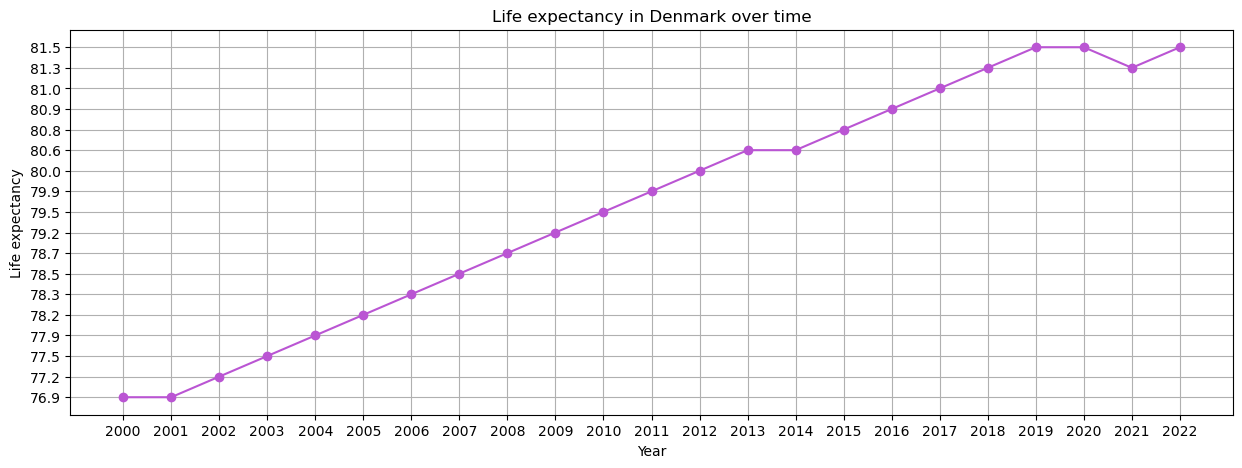

In [134]:
# Filter the dataset for only "All Denmark"
all_denmark_data = hisb77[hisb77['Province'] == 'All Denmark'].copy()

# Split the "Year" column to separate start and end years
#all_denmark_data[['Start Year', 'End Year']] = all_denmark_data['Year'].str.split(':', expand=True)

# Convert columns to numeric values
#all_denmark_data.loc[:, 'Start Year'] = all_denmark_data['Start Year'].astype(int)
#all_denmark_data.loc[:, 'End Year'] = all_denmark_data['End Year'].astype(int)

# Plot the curve diagram
plt.figure(figsize=(15, 5))
plt.plot(all_denmark_data['Year'], all_denmark_data['Life expectancy'], marker='o', color='mediumorchid')
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.title('Life expectancy in Denmark over time')
plt.grid(True)
plt.show()

From the figure above we can see that the life expectancy overall has increased in the past 22 years. It had decreased from 2020-2021 due to the COVID-19. 

In order to investigate the difference in life expectancy across provinces in Denmark, we make an interactive plot.

**Interactive plot** :

In [135]:
# Convert 'Life expectancy' column to numeric
hisb77['Life expectancy'] = pd.to_numeric(hisb77['Life expectancy'])

# Group data by year and province
grouped_data = hisb77.groupby(['Year', 'Province'])['Life expectancy'].mean().unstack()

# Create function to update the plot
def update_plot(year):
    if year in grouped_data.index:
        plt.figure(figsize=(10, 6))
        grouped_data.loc[year].plot(kind='bar', color='mediumorchid')
        plt.ylabel('Life expectancy')
        plt.title(f'Life expectancy by province in {year}')
        plt.xticks(rotation=45, ha='right')
        plt.ylim(75, 82.5)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for the selected year: {year}")

# We create a dropdown widget for 2000-2022
year_dropdown = widgets.Dropdown(
    options=hisb77['Year'].unique(),
    description='Year:',
    disabled=False,
)

# We can now create an interactive plot
interactive_plot = widgets.interactive(update_plot, year=year_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Year:', options=('2000', '2001', '2002', '2003', '2004', '2005', '…

From the interactive plot it can be seen that the life expectancy has increased across all provinces in Denmark. It can also be seen that the life expectancy is the lowest in 'Province West and South Zealand' in 2022 compared to the other provinces in this year. In this year the life expectancy is the highest in 'Province North Zealand'. 

Furthermore, it can be seen that the life expectancy has increased the most in 'Province City of Copenhagen' from 2000-2022.

We now make a bar diagram of the proportion of Master's degree across the provinces in Denmark.

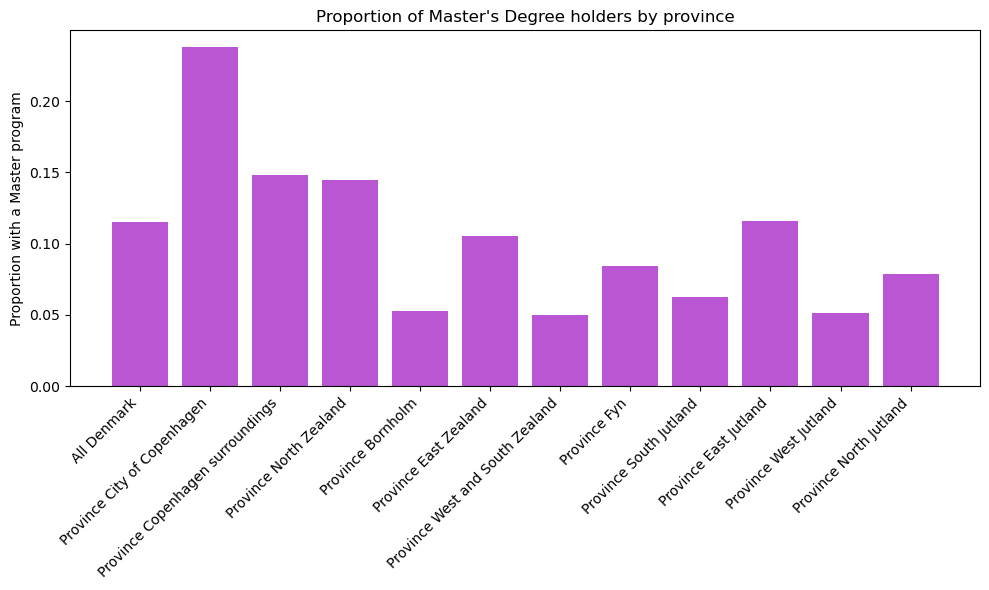

In [136]:
# Plot of the bar diagram
plt.figure(figsize=(10, 6))
plt.bar(education['Province'], education['Proportion with a Master´s degree'], color='mediumorchid')
plt.ylabel('Proportion with a Master program')
plt.title('Proportion of Master\'s Degree holders by province')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Here, we see that the 'Province City of Copenhagen' has the highest proportion with a Master degree. The 'Province West and South Zealand' has the lowest degree of people with a Master's degree.

# Merge data sets

To merge the two datasets we make an left join. We dot this because we want all the data from the education file and to drop the data from life expectancy which is not from 2022. 

In [138]:
# Convert the 'Year' column to the same data type in the education DataFrame
education['Year'] = education['Year'].astype(str)

# Convert the 'Year' column to the same data type in the hisb77 DataFrame
hisb77['Year'] = hisb77['Year'].astype(str)

#Merging the teo datasets
education_with_hisb77=pd.merge(education, hisb77, on=['Province', 'Year'], how='left')
display(education_with_hisb77)

,Province,Total education,Master´s degree,Proportion with a Master´s degree,Year,Life expectancy
0,All Denmark,4093404.0,470853.0,0.115027,2022,81.5
1,Province City of Copenhagen,623705.0,148355.0,0.237861,2022,81.2
2,Province Copenhagen surroundings,382522.0,56632.0,0.148049,2022,81.9
3,Province North Zealand,308911.0,44688.0,0.144663,2022,82.2
4,Province Bornholm,25567.0,1357.0,0.053076,2022,80.4
5,Province East Zealand,172688.0,18254.0,0.105705,2022,82.0
6,Province West and South Zealand,398334.0,19881.0,0.049910,2022,80.2
7,Province Fyn,345607.0,29067.0,0.084104,2022,81.4
8,Province South Jutland,493289.0,31048.0,0.062941,2022,81.5
9,Province East Jutland,648173.0,75017.0,0.115736,2022,82.0


From the table above it can be seen that the data has been merge successfully. 

# Analysis

In this section we will investigate whether there is a correlation between life expectancy in the provinces and the proportion with a Master's degree. We do this by making a scatter plot.

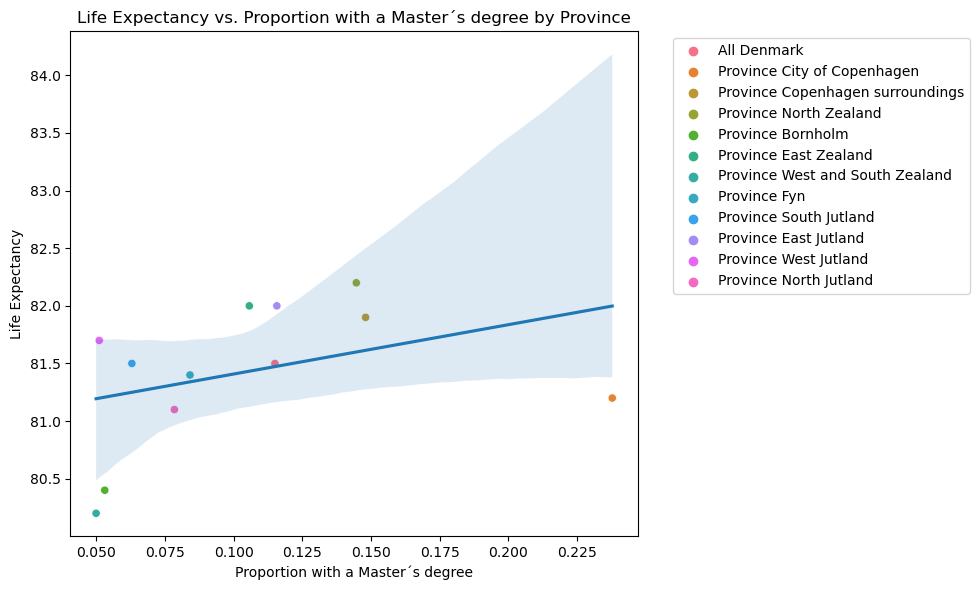

In [142]:
# Create scatter plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=education_with_hisb77, x='Proportion with a Master´s degree', y='Life expectancy', hue='Province')

# Add trendline
sns.regplot(data=education_with_hisb77, x='Proportion with a Master´s degree', y='Life expectancy', scatter=False)

# Set title and labels
plt.title('Life Expectancy and Proportion with a Master´s degree by Province')
plt.xlabel('Proportion with a Master´s degree')
plt.ylabel('Life Expectancy')

# Show plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In the scatter plot above it can be seen that there is a positive correlation between life expectancy and the proportion with a Master's degree. The blue area around the trend line is a 95% confidence interval. Most of the provinces is within this confidence interval. This means that our data is relatively consistent with the trend that we have observed.

In 'Province Bornholm' and 'Province West and South Zealand' they have a lower life expectancy than expected for their proportion of Master's degree. 
The same applies to 'Province City of Copenhagen'

# Conclusion